In [339]:
# Import general libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Import Tensorflow-related libraries and functions
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

# Import Scikit-Learn machine learning functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, precision_score, f1_score, recall_score

print("Successful Import")

Successful Import


# Import Data

In [20]:
os.chdir('C:/Users/willi/Documents/Data Science Practice Projects/Business Loan Creditworthiness Prediction/')
df = pd.read_csv(r'SBAnational_CLEANED_num.csv')
df.head()

,Target_MIS_Status,Term,NoEmp,NewExist,UrbanRural,RevLineCr,DisbursementGross,GrAppv,SBA_Appv,Industry_Accommodation and food services,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,1,84,4,1,1,1,103579.0,50000.0,25000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,84,17,1,1,1,93896.0,30000.0,15000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,84,7,1,1,1,136241.0,80000.0,40000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,34,5,1,1,0,81771.0,75000.0,37500.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,37,5,1,1,0,185000.0,100000.0,50000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189019 entries, 0 to 189018
Data columns (total 82 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   Target_MIS_Status                                                                  189019 non-null  int64  
 1   Term                                                                               189019 non-null  int64  
 2   NoEmp                                                                              189019 non-null  int64  
 3   NewExist                                                                           189019 non-null  int64  
 4   UrbanRural                                                                         189019 non-null  int64  
 5   RevLineCr                                                                          189019 non

In [22]:
print(df.columns)

Index(['Target_MIS_Status', 'Term', 'NoEmp', 'NewExist', 'UrbanRural',
       'RevLineCr', 'DisbursementGross', 'GrAppv', 'SBA_Appv',
       'Industry_Accommodation and food services',
       'Industry_Administrative and support and waste management and remediation services',
       'Industry_Agriculture, forestry, fishing and hunting',
       'Industry_Arts, entertainment, and recreation', 'Industry_Construction',
       'Industry_Educational services', 'Industry_Finance and insurance',
       'Industry_Health care and social assistance', 'Industry_Information',
       'Industry_Management of companies and enterprises',
       'Industry_Manufacturing',
       'Industry_Mining, quarrying, and oil and gas extraction',
       'Industry_Other services (except public administration)',
       'Industry_Professional, scientific, and technical services',
       'Industry_Public administration',
       'Industry_Real estate and rental and leasing', 'Industry_Retail trade',
       'Industry_Tra

Binary Data Dictionary:

'Target_MIS_Status' : '0' = 'Default', '1' = 'Paid in Full'

'NewExist' : '0' = 'Existing Business', '2' = 'New Business'

'UrbanRural' : '0' = 'Urban', '2' = 'Rural'

'RevLineCr' : Revolving Line of Credit : '0' = 'No', '2' = 'Yes'

# Neural Network Prediction

## Data Sampling

In [26]:
neuralDf = df.copy()
neuralDf = neuralDf.sample(frac = 1) # 100% of data is randomly resuffled to ensure that it is not sorted.
neuralDf.head()

,Target_MIS_Status,Term,NoEmp,NewExist,UrbanRural,RevLineCr,DisbursementGross,GrAppv,SBA_Appv,Industry_Accommodation and food services,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
38980,1,84,2,0,0,1,18123.0,5000.0,2500.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3240,0,19,1,0,0,1,94440.0,70000.0,35000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96773,1,72,9,0,0,0,125000.0,125000.0,62500.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176960,0,57,2,0,0,1,66955.0,30000.0,15000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31768,1,84,4,0,1,0,229700.0,229700.0,114850.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Model Input Preparation 

### Scaling non-binary attributes

We will utilize the standardized scaling technique:

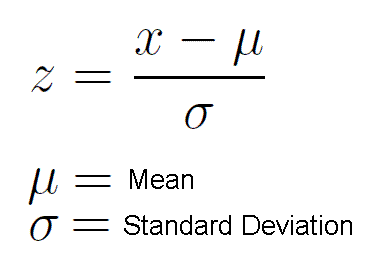

In [140]:
scaler = StandardScaler()

nonbinfeats = ['Term', 'NoEmp', 'DisbursementGross', 'GrAppv', 'SBA_Appv']

neuralDf_scaled = neuralDf.copy()
neuralDf_scaled[nonbinfeats] = scaler.fit_transform(neuralDf_scaled[nonbinfeats])
neuralDf_scaled.head()

,Target_MIS_Status,Term,NoEmp,NewExist,UrbanRural,RevLineCr,DisbursementGross,GrAppv,SBA_Appv,Industry_Accommodation and food services,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
38980,1,0.233333,0.000250,0,0,1,0.001350,0.002001,0.001167,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3240,0,0.052778,0.000125,0,0,1,0.008645,0.034517,0.020122,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96773,1,0.200000,0.001125,0,0,0,0.011567,0.062031,0.036162,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176960,0,0.158333,0.000250,0,0,1,0.006018,0.014507,0.008457,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31768,1,0.233333,0.000500,0,1,0,0.021575,0.114407,0.066696,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [141]:
neuralDf_scaled.describe()

,Target_MIS_Status,Term,NoEmp,NewExist,UrbanRural,RevLineCr,DisbursementGross,GrAppv,SBA_Appv,Industry_Accommodation and food services,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
count,189019.000000,189019.000000,189019.000000,189019.000000,189019.000000,189019.000000,189019.000000,189019.000000,189019.000000,189019.000000,...,189019.000000,189019.000000,189019.000000,189019.000000,189019.000000,189019.000000,189019.000000,189019.000000,189019.000000,189019.000000
mean,0.614891,0.188847,0.000760,0.310784,0.168999,0.572170,0.010334,0.041302,0.030631,0.087526,...,0.001619,0.009264,0.064200,0.030166,0.015046,0.004280,0.024400,0.020934,0.002217,0.001074
std,0.486622,0.104341,0.003391,0.462816,0.374752,0.494765,0.019199,0.087685,0.076486,0.282604,...,0.040203,0.095801,0.245109,0.171045,0.121737,0.065282,0.154287,0.143165,0.047030,0.032754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.127778,0.000125,0.000000,0.000000,0.000000,0.002007,0.009505,0.006707,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.200000,0.000375,0.000000,0.000000,1.000000,0.004436,0.017009,0.011257,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.233333,0.000750,1.000000,0.000000,1.000000,0.010037,0.037019,0.022164,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Split data into train/test splits

In [142]:
X = neuralDf_scaled.drop(columns = ['Target_MIS_Status'])
y = neuralDf_scaled['Target_MIS_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (151215, 81)
X_test shape:  (37804, 81)
y_train shape:  (151215,)
y_test shape:  (37804,)


In [143]:
print(X_train.shape[1])

81


## Model Structure Optimization

We want to optimize a network with 3 hidden layers
- Each hidden layer can have from 64 to 256 nodes
- The step size between nodes is 64
- So the possibilities are: 64, 128, 192, 256

In [162]:
num_layers = 3
min_nodes_per_layer, max_nodes_per_layer = 64, 256
node_step_size = 64

In [163]:
node_options = list(range(
    min_nodes_per_layer, 
    max_nodes_per_layer + 1, 
    node_step_size
))
node_options

[64, 128, 192, 256]

In [165]:
three_layer_possibilities = [node_options, node_options, node_options]
three_layer_possibilities

[[64, 128, 192, 256], [64, 128, 192, 256], [64, 128, 192, 256]]

In [171]:
# Return all permutations between the three lists
layer_node_permutations = list(itertools.product(*three_layer_possibilities))
layer_node_permutations

[(64, 64, 64),
 (64, 64, 128),
 (64, 64, 192),
 (64, 64, 256),
 (64, 128, 64),
 (64, 128, 128),
 (64, 128, 192),
 (64, 128, 256),
 (64, 192, 64),
 (64, 192, 128),
 (64, 192, 192),
 (64, 192, 256),
 (64, 256, 64),
 (64, 256, 128),
 (64, 256, 192),
 (64, 256, 256),
 (128, 64, 64),
 (128, 64, 128),
 (128, 64, 192),
 (128, 64, 256),
 (128, 128, 64),
 (128, 128, 128),
 (128, 128, 192),
 (128, 128, 256),
 (128, 192, 64),
 (128, 192, 128),
 (128, 192, 192),
 (128, 192, 256),
 (128, 256, 64),
 (128, 256, 128),
 (128, 256, 192),
 (128, 256, 256),
 (192, 64, 64),
 (192, 64, 128),
 (192, 64, 192),
 (192, 64, 256),
 (192, 128, 64),
 (192, 128, 128),
 (192, 128, 192),
 (192, 128, 256),
 (192, 192, 64),
 (192, 192, 128),
 (192, 192, 192),
 (192, 192, 256),
 (192, 256, 64),
 (192, 256, 128),
 (192, 256, 192),
 (192, 256, 256),
 (256, 64, 64),
 (256, 64, 128),
 (256, 64, 192),
 (256, 64, 256),
 (256, 128, 64),
 (256, 128, 128),
 (256, 128, 192),
 (256, 128, 256),
 (256, 192, 64),
 (256, 192, 128),
 (2

In [172]:
# Iterate over the permutations and then iterate again over the values of individual permutation to get the node count for each hidden layer:
for permutation in layer_node_permutations[:2]:
    for nodes_at_layer in permutation:
        print(nodes_at_layer)
    print()

64
64
64

64
64
128



- Create a new Sequential model at each iteration, adding an InputLayer to it with a shape of (81,) (the number of columns in our dataset)
- Then, iterate over the items in a single permutation and add a Dense layer to the model with the current number of nodes
- Finally, add a Dense output layer
- Set a name to the model so it's easier to compare them later:

In [173]:
models = []

for permutation in layer_node_permutations:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
    model_name = ''
    
    for nodes_at_layer in permutation:
        model.add(tf.keras.layers.Dense(nodes_at_layer, activation='relu'))
        model_name += f'dense{nodes_at_layer}_'
        
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model._name = model_name[:-1]
    
    models.append(model)

In [174]:
models[0].summary()

Model: "dense64_dense64_dense64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 64)                5248      
                                                                 
 dense_71 (Dense)            (None, 64)                4160      
                                                                 
 dense_72 (Dense)            (None, 64)                4160      
                                                                 
 dense_73 (Dense)            (None, 1)                 65        
                                                                 
Total params: 13633 (53.25 KB)
Trainable params: 13633 (53.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [225]:
models[1].summary()

Model: "dense64_dense64_dense128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 64)                5248      
                                                                 
 dense_75 (Dense)            (None, 64)                4160      
                                                                 
 dense_76 (Dense)            (None, 128)               8320      
                                                                 
 dense_77 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17857 (69.75 KB)
Trainable params: 17857 (69.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [175]:
# Define function to get architecture possibilities 
def get_models(num_layers: int,
               min_nodes_per_layer: int,
               max_nodes_per_layer: int,
               node_step_size: int,
               input_shape: tuple,
               hidden_layer_activation: str = 'relu',
               num_nodes_at_output: int = 1,
               output_layer_activation: str = 'sigmoid') -> list:
    
    node_options = list(range(min_nodes_per_layer, max_nodes_per_layer + 1, node_step_size))
    layer_possibilities = [node_options] * num_layers
    layer_node_permutations = list(itertools.product(*layer_possibilities))
    
    models = []
    for permutation in layer_node_permutations:
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
        model_name = ''

        for nodes_at_layer in permutation:
            model.add(tf.keras.layers.Dense(nodes_at_layer, activation=hidden_layer_activation))
            model_name += f'dense{nodes_at_layer}_'

        model.add(tf.keras.layers.Dense(num_nodes_at_output, activation=output_layer_activation))
        model._name = model_name[:-1]
        models.append(model)
        
    return models

In [176]:
all_models = get_models(
    num_layers=3, 
    min_nodes_per_layer=64, 
    max_nodes_per_layer=256, 
    node_step_size=64, 
    input_shape=(12,)
)

In [177]:
print(f'#Models = {len(all_models)}')
print()

for model in all_models:
    print(model.name)

#Models = 64

dense64_dense64_dense64
dense64_dense64_dense128
dense64_dense64_dense192
dense64_dense64_dense256
dense64_dense128_dense64
dense64_dense128_dense128
dense64_dense128_dense192
dense64_dense128_dense256
dense64_dense192_dense64
dense64_dense192_dense128
dense64_dense192_dense192
dense64_dense192_dense256
dense64_dense256_dense64
dense64_dense256_dense128
dense64_dense256_dense192
dense64_dense256_dense256
dense128_dense64_dense64
dense128_dense64_dense128
dense128_dense64_dense192
dense128_dense64_dense256
dense128_dense128_dense64
dense128_dense128_dense128
dense128_dense128_dense192
dense128_dense128_dense256
dense128_dense192_dense64
dense128_dense192_dense128
dense128_dense192_dense192
dense128_dense192_dense256
dense128_dense256_dense64
dense128_dense256_dense128
dense128_dense256_dense192
dense128_dense256_dense256
dense192_dense64_dense64
dense192_dense64_dense128
dense192_dense64_dense192
dense192_dense64_dense256
dense192_dense128_dense64
dense192_dense128_dense12

Model Performance Metrics

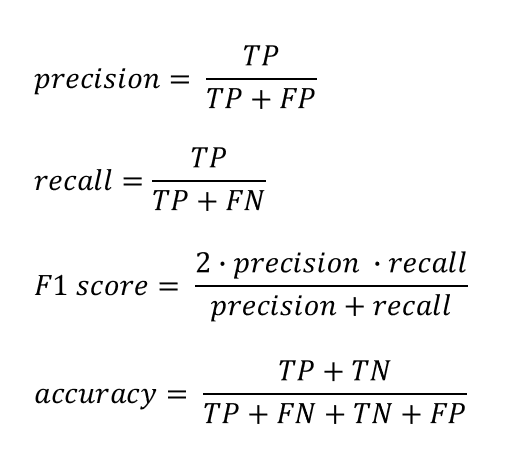

In [179]:
# Define function to accept the list of models, data sets, and number of epochs; ultimately to optimize a model
def optimize(models: list,
             X_train: np.array,
             y_train: np.array,
             X_test: np.array,
             y_test: np.array,
             epochs: int = 100,
             verbose: int = 0) -> pd.DataFrame:
    
    # Store the results here
    results = []
    
    def train(model: tf.keras.Sequential) -> dict:
        learning_rate = 0.001
        optimizer = optimizers.SGD(learning_rate)
        model.compile(
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            optimizer=optimizer,
            metrics=['accuracy']) 
               
        # Train the model
        model.fit(
            X_train,
            y_train,
            epochs=epochs,
            verbose=verbose
        )
        
        # Make predictions on the test set
        preds = model.predict(X_test)
        prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(preds)] # Selecting a baseline threshold of 0.5 as this is a binary classification problem
        
        # Return evaluation metrics on the test set
        return {
            'model_name': model.name,
            'test_accuracy': accuracy_score(y_test, prediction_classes),
            'test_precision': precision_score(y_test, prediction_classes),
            'test_recall': recall_score(y_test, prediction_classes),
            'test_f1': f1_score(y_test, prediction_classes)
        }
    
    # Train every model and save results
    for model in models:
        try:
            print(model.name, end=' ... ')
            res = train(model=model)
            results.append(res)
        except Exception as e:
            print(f'{model.name} --> {str(e)}')
        
    return pd.DataFrame(results)

In [185]:
# Perform optimization (takes very long runtime 537 min)
optimization_results = optimize(
    models=models,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

dense64_dense64_dense64 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 715us/step
dense64_dense64_dense128 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 691us/step
dense64_dense64_dense192 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 715us/step
dense64_dense64_dense256 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 777us/step
dense64_dense128_dense64 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 741us/step
dense64_dense128_dense128 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 734us/step
dense64_dense128_dense192 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 740us/step
dense64_dense128_dense256 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 813us/step
dense64_dense192_dense64 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 762us/step
dense64_dense192_dense128 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 747us/step
dense64_dense192_dense192 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 805us/step
dense64_dense192_dense256 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 836us/step
dense64_dense256_dense64 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 737us/step
dense64_dense256_dense128 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 874us/step
dense64_dense256_dense192 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 810us/step
dense64_dense256_dense256 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 843us/step
dense128_dense64_dense64 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 759us/step
dense128_dense64_dense128 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 734us/step
dense128_dense64_dense192 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 738us/step
dense128_dense64_dense256 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 737us/step
dense128_dense128_dense64 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 803us/step
dense128_dense128_dense128 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 752us/step
dense128_dense128_dense192 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 777us/step
dense128_dense128_dense256 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 814us/step
dense128_dense192_dense64 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 753us/step
dense128_dense192_dense128 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 793us/step
dense128_dense192_dense192 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 899us/step
dense128_dense192_dense256 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 837us/step
dense128_dense256_dense64 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 817us/step
dense128_dense256_dense128 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 919us/step
dense128_dense256_dense192 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 949us/step
dense128_dense256_dense256 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 923us/step
dense192_dense64_dense64 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 751us/step
dense192_dense64_dense128 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 743us/step
dense192_dense64_dense192 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 741us/step
dense192_dense64_dense256 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 762us/step
dense192_dense128_dense64 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 760us/step
dense192_dense128_dense128 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 779us/step
dense192_dense128_dense192 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 800us/step
dense192_dense128_dense256 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 863us/step
dense192_dense192_dense64 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 797us/step
dense192_dense192_dense128 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 843us/step
dense192_dense192_dense192 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 856us/step
dense192_dense192_dense256 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 848us/step
dense192_dense256_dense64 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 872us/step
dense192_dense256_dense128 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 908us/step
dense192_dense256_dense192 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 854us/step
dense192_dense256_dense256 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 886us/step
dense256_dense64_dense64 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 776us/step
dense256_dense64_dense128 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 757us/step
dense256_dense64_dense192 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 781us/step
dense256_dense64_dense256 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 787us/step
dense256_dense128_dense64 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 846us/step
dense256_dense128_dense128 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 905us/step
dense256_dense128_dense192 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 892us/step
dense256_dense128_dense256 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 911us/step
dense256_dense192_dense64 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 859us/step
dense256_dense192_dense128 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 871us/step
dense256_dense192_dense192 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 903us/step
dense256_dense192_dense256 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 1ms/step
dense256_dense256_dense64 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 851us/step
dense256_dense256_dense128 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 936us/step
dense256_dense256_dense192 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 921us/step
dense256_dense256_dense256 ... 

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 1ms/step


In [186]:
optimization_results.sort_values(by='test_accuracy', ascending=False)

,model_name,test_accuracy,test_precision,test_recall,test_f1
1,dense64_dense64_dense128,0.802375,0.850133,0.823760,0.836739
30,dense128_dense256_dense192,0.801185,0.846656,0.826255,0.836331
32,dense192_dense64_dense64,0.794889,0.821001,0.852158,0.836289
5,dense64_dense128_dense128,0.794493,0.814165,0.862613,0.837689
35,dense192_dense64_dense256,0.792906,0.807183,0.871262,0.837999
...,...,...,...,...,...
13,dense64_dense256_dense128,0.546371,0.915666,0.288714,0.439007
21,dense128_dense128_dense128,0.530764,0.913311,0.261564,0.406663
48,dense256_dense64_dense64,0.501587,0.916809,0.208167,0.339294
60,dense256_dense256_dense64,0.437917,0.889367,0.097887,0.176363


A 64,64,128 node three hidden layer model is the optimal model structure.

## Optimal Three Hidden Layer Model

In [235]:
for model in models:
    print(model.name,' , ', model)

dense64_dense64_dense64  ,  <keras.src.engine.sequential.Sequential object at 0x0000023648D3B700>
dense64_dense64_dense128  ,  <keras.src.engine.sequential.Sequential object at 0x0000023648D085E0>
dense64_dense64_dense192  ,  <keras.src.engine.sequential.Sequential object at 0x00000236F0C27280>
dense64_dense64_dense256  ,  <keras.src.engine.sequential.Sequential object at 0x00000236F0C27430>
dense64_dense128_dense64  ,  <keras.src.engine.sequential.Sequential object at 0x00000236F0C04C40>
dense64_dense128_dense128  ,  <keras.src.engine.sequential.Sequential object at 0x000002364C032460>
dense64_dense128_dense192  ,  <keras.src.engine.sequential.Sequential object at 0x00000236C70D67C0>
dense64_dense128_dense256  ,  <keras.src.engine.sequential.Sequential object at 0x0000023681ADF8B0>
dense64_dense192_dense64  ,  <keras.src.engine.sequential.Sequential object at 0x0000023697A24D30>
dense64_dense192_dense128  ,  <keras.src.engine.sequential.Sequential object at 0x000002364AD5FD90>
dense64

Optimal model is second in the list of models.

In [236]:
models[1].summary()

Model: "dense64_dense64_dense128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 64)                5248      
                                                                 
 dense_75 (Dense)            (None, 64)                4160      
                                                                 
 dense_76 (Dense)            (None, 128)               8320      
                                                                 
 dense_77 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17857 (69.75 KB)
Trainable params: 17857 (69.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [240]:
epochs = 100
verbose = 0

history = models[1].fit(X_train, y_train, epochs = epochs, verbose = 0) #, batch_size = batch_size)

In [243]:
loss, accuracy = models[1].evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

  62/1182 [>.............................] - ETA: 0s - loss: 0.4776 - accuracy: 0.8155  

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 779us/step - loss: 0.4912 - accuracy: 0.8045
Accuracy: 80.45


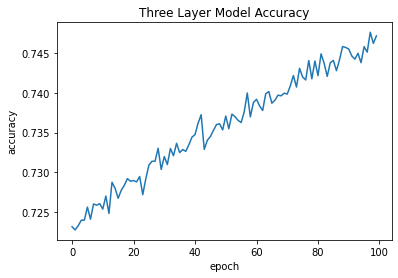

In [241]:
plt.plot(history.history['accuracy'])
plt.title('Three Layer Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

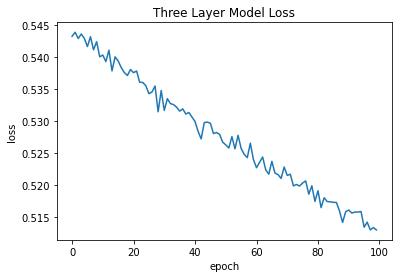

In [244]:
plt.plot(history.history['loss'])
plt.title('Three Layer Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [327]:
preds = models[1].predict(X_test)
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(preds)]

1182/1182 [==============================] - 1s 697us/step


In [291]:
metrics_dict = {'test_accuracy': accuracy_score(y_test, prediction_classes),
'test_precision': precision_score(y_test, prediction_classes),
'test_recall': recall_score(y_test, prediction_classes),
'test_f1': f1_score(y_test, prediction_classes)}

print(f"'{three_layer_model._name}' Model Metrics")
print('-'*150)
print(metrics_dict)
print('='*150)

'dense64_dense64_dense128' Model Metrics
------------------------------------------------------------------------------------------------------------------------------------------------------
{'test_accuracy': 0.8045444926462808, 'test_precision': 0.8858060747663551, 'test_recall': 0.7830127791403124, 'test_f1': 0.8312435765673175}


In [292]:
print(np.unique(prediction_classes, return_counts = True))

(array([0, 1]), array([17260, 20544], dtype=int64))


In [328]:
# Confusion Matrix
cm = confusion_matrix(y_test, prediction_classes)
#print(cm)
cmtx = pd.DataFrame(cm, index = ['True: 0', 'True: 1'], columns = ['Pred: 0', 'Pred: 1'])
print('Confusion Matrix')
print(cmtx)

Confusion Matrix
         Pred: 0  Pred: 1
True: 0    12217     2346
True: 1     5043    18198


1182/1182 [==============================] - 1s 708us/step

Best Threshold = 0.483769, G-Mean=0.814


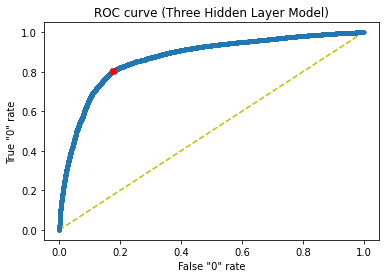

In [331]:
# ROC Curve
y_preds = models[1].predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

# Calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('\nBest Threshold = %f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


plt.figure()
plt.plot([0,1],[0,1],'y--', zorder = 1)
plt.plot(fpr, tpr, marker = '.', zorder = 2)
plt.scatter(fpr[ix], tpr[ix], marker='X', color='red', label='Best Treshold Ratio', zorder = 3)
plt.xlabel('False "0" rate')
plt.ylabel('True "0" rate')
plt.title('ROC curve (Three Hidden Layer Model)')
plt.show()

Geometric Mean Formula

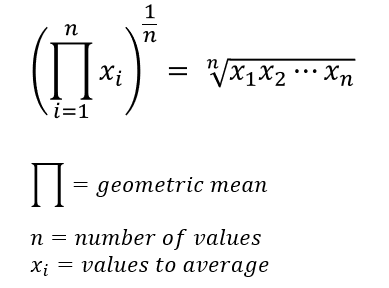

See if we can optimize accuracy by changing threshold based on optimal geometric mean (G-Mean) Ratio. Based on ROC curve above, that threshold seems to be 0.483769

In [332]:
preds = models[1].predict(X_test)
prediction_classes = [1 if prob > thresholds[ix] else 0 for prob in np.ravel(preds)]

1182/1182 [==============================] - 1s 687us/step


In [298]:
metrics_dict = {'test_accuracy': accuracy_score(y_test, prediction_classes),
'test_precision': precision_score(y_test, prediction_classes),
'test_recall': recall_score(y_test, prediction_classes),
'test_f1': f1_score(y_test, prediction_classes)}

print(f"'{three_layer_model._name}' Model Metrics")
print('-'*150)
print(metrics_dict)
print('='*150)

'dense64_dense64_dense128' Model Metrics
------------------------------------------------------------------------------------------------------------------------------------------------------
{'test_accuracy': 0.811898211829436, 'test_precision': 0.8792082001128456, 'test_recall': 0.8045695107783658, 'test_f1': 0.840234559302613}


In [333]:
# Confusion Matrix
cm = confusion_matrix(y_test, prediction_classes)
#print(cm)
cmtx = pd.DataFrame(cm, index = ['True: 0', 'True: 1'], columns = ['Pred: 0', 'Pred: 1'])
print('Confusion Matrix')
print(cmtx)

Confusion Matrix
         Pred: 0  Pred: 1
True: 0    11994     2569
True: 1     4542    18699


We were able to slightly improve accuracy from 80.45% to 81.19%.

## One Hidden Layer Model for Comparison (Shallow Neural Network)

In [311]:
singleLayerNodes = [25] # Numer of nodes for the hidden layer

# Initiate Sequential model
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],))) # Input Layer
model1_name = ''

# Add hidden layer(s)    
for nodes_at_layer in singleLayerNodes:
    model1.add(tf.keras.layers.Dense(nodes_at_layer, activation='relu'))
    model1_name += f'dense{nodes_at_layer}_'
        
model1.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output Layer
model1._name = model1_name[:-1]

In [312]:
print(model1._name)

dense25


In [313]:
learning_rate = 0.001
optimizer = optimizers.SGD(learning_rate)
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    optimizer=optimizer, metrics=['accuracy'])
model1.summary()

Model: "dense25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_602 (Dense)           (None, 25)                2050      
                                                                 
 dense_603 (Dense)           (None, 1)                 26        
                                                                 
Total params: 2076 (8.11 KB)
Trainable params: 2076 (8.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [314]:
# Train model
epochs = 100
batch_size = 64

history1 = model1.fit(X_train, y_train, epochs = epochs) #, batch_size = batch_size)

Epoch 1/100


C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4726/4726 [==============================] - 4s 824us/step - loss: 0.7122 - accuracy: 0.5864
Epoch 2/100
4726/4726 [==============================] - 4s 809us/step - loss: 0.6653 - accuracy: 0.6088
Epoch 3/100
4726/4726 [==============================] - 4s 806us/step - loss: 0.6605 - accuracy: 0.6137
Epoch 4/100
4726/4726 [==============================] - 4s 820us/step - loss: 0.6581 - accuracy: 0.6161
Epoch 5/100
4726/4726 [==============================] - 4s 827us/step - loss: 0.6569 - accuracy: 0.6167
Epoch 6/100
4726/4726 [==============================] - 4s 843us/step - loss: 0.6560 - accuracy: 0.6182
Epoch 7/100
4726/4726 [==============================] - 4s 864us/step - loss: 0.6545 - accuracy: 0.6201
Epoch 8/100
4726/4726 [==============================] - 4s 861us/step - loss: 0.6536 - accuracy: 0.6199
Epoch 9/100
4726/4726 [==============================] - 4s 822us/step - loss: 0.6528 - accuracy: 0.6223
Epoch 10/100
4726/4726 [==============================] - 4s 825us/

In [315]:
loss, accuracy = model1.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

  65/1182 [>.............................] - ETA: 0s - loss: 0.6833 - accuracy: 0.6394  

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1182/1182 [==============================] - 1s 729us/step - loss: 0.7305 - accuracy: 0.6169
Accuracy: 61.69


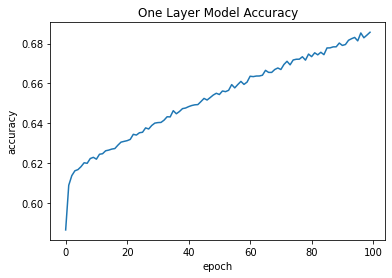

In [316]:
plt.plot(history1.history['accuracy'])
plt.title('One Layer Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

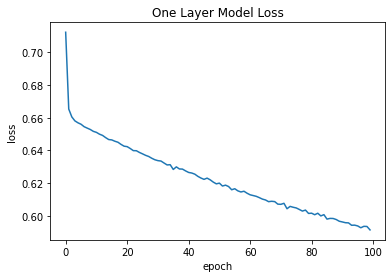

In [317]:
plt.plot(history1.history['loss'])
plt.title('One Layer Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [334]:
preds = model1.predict(X_test)
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(preds)]

1182/1182 [==============================] - 1s 651us/step


In [319]:
metrics_dict = {'test_accuracy': accuracy_score(y_test, prediction_classes),
'test_precision': precision_score(y_test, prediction_classes),
'test_recall': recall_score(y_test, prediction_classes),
'test_f1': f1_score(y_test, prediction_classes)}

print(f"'{model1._name}' Model Metrics")
print('-'*150)
print(metrics_dict)
print('='*150)

'dense25' Model Metrics
------------------------------------------------------------------------------------------------------------------------------------------------------
{'test_accuracy': 0.6168659401121575, 'test_precision': 0.6160820806490098, 'test_recall': 0.9998709177746224, 'test_f1': 0.7624015748031496}


In [335]:
# Confusion Matrix
cm = confusion_matrix(y_test, prediction_classes)
#print(cm)
cmtx = pd.DataFrame(cm, index = ['True: 0', 'True: 1'], columns = ['Pred: 0', 'Pred: 1'])
print('Confusion Matrix')
print(cmtx)

Confusion Matrix
         Pred: 0  Pred: 1
True: 0       82    14481
True: 1        3    23238


We see that the accuracy is quite low and the confusion matrix shoes that nearly all test instances are being predicted as class '1'. This indicates that the even threshold of 0.5 is not adequate for this model prediction. We will find the optimal threshold by maximizing the G-Means ratio. 

1182/1182 [==============================] - 1s 726us/step

Best Threshold = 0.845530, G-Mean=0.717


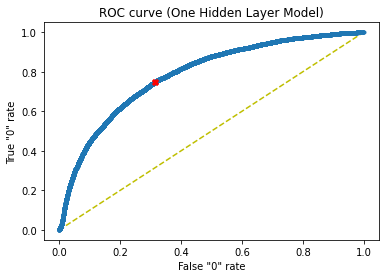

In [336]:
# ROC Curve
y_preds = model1.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

# Calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('\nBest Threshold = %f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


plt.figure()
plt.plot([0,1],[0,1],'y--', zorder = 1)
plt.plot(fpr, tpr, marker = '.', zorder = 2)
plt.scatter(fpr[ix], tpr[ix], marker='X', color='red', label='Best Treshold Ratio', zorder = 3)
plt.xlabel('False "0" rate')
plt.ylabel('True "0" rate')
plt.title('ROC curve (One Hidden Layer Model)')
plt.show()

In [337]:
preds = model1.predict(X_test)
prediction_classes = [1 if prob > thresholds[ix] else 0 for prob in np.ravel(preds)]

1182/1182 [==============================] - 1s 660us/step


In [324]:
metrics_dict = {'test_accuracy': accuracy_score(y_test, prediction_classes),
'test_precision': precision_score(y_test, prediction_classes),
'test_recall': recall_score(y_test, prediction_classes),
'test_f1': f1_score(y_test, prediction_classes)}

print(f"'{model1._name}' Model Metrics")
print('-'*150)
print(metrics_dict)
print('='*150)

'dense25' Model Metrics
------------------------------------------------------------------------------------------------------------------------------------------------------
{'test_accuracy': 0.7246058618135647, 'test_precision': 0.7921220400728597, 'test_recall': 0.748461770147584, 'test_f1': 0.7696732373177584}


In [338]:
# Confusion Matrix
cm = confusion_matrix(y_test, prediction_classes)
#print(cm)
cmtx = pd.DataFrame(cm, index = ['True: 0', 'True: 1'], columns = ['Pred: 0', 'Pred: 1'])
print('Confusion Matrix')
print(cmtx)

Confusion Matrix
         Pred: 0  Pred: 1
True: 0     9998     4565
True: 1     5846    17395


After threshold optimization, we were able to maximize accuracy to 72.5%, which is better than the accuracy resulting from with an even probability split of 61.7%. This is still far below the accuracty of a model with three hidden layers. 